# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project 2: Building a Student Intervention System

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

### Question 1 - Classification vs. Regression
*Your goal for this project is to identify students who might need early intervention before they fail to graduate. Which type of supervised learning problem is this, classification or regression? Why?*

**Answer: **
The goal is to find out how likely a student is to pass their high school final exam, by constructing an intervention system that leverages supervised learning techniques.So we need to categorized students in two groups of "PASS" and "FAIL". This can be a classification problem.

But I can think of this problem as a regression problem by outputting the percentage indicating how likely student will pass the final exam. In this scenario students with middle percentage can be given another chance by working harder or having extra classes to reach the exam.


## Exploring the Data
Run the code cell below to load necessary Python libraries and load the student data. Note that the last column from this dataset, `'passed'`, will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.

In [20]:
# Import libraries
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score

# Read student data
student_data = pd.read_csv("student-data.csv")
print "Student data read successfully!"

Student data read successfully!


### Implementation: Data Exploration
Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
- The total number of students, `n_students`.
- The total number of features for each student, `n_features`.
- The number of those students who passed, `n_passed`.
- The number of those students who failed, `n_failed`.
- The graduation rate of the class, `grad_rate`, in percent (%).


In [21]:
# TODO: Calculate number of students
n_students = len(student_data)

# TODO: Calculate number of features
n_features = len(student_data.columns[student_data.columns != 'passed'])

# TODO: Calculate passing students
n_passed = len(student_data[student_data.passed == 'yes'])

# TODO: Calculate failing students
n_failed = len(student_data[student_data.passed == 'no'])

# TODO: Calculate graduation rate
grad_rate = (float(n_passed)/n_students) * 100.0

# Print the results
print "Total number of students: {}".format(n_students)
print "Number of features: {}".format(n_features)
print "Number of students who passed: {}".format(n_passed)
print "Number of students who failed: {}".format(n_failed)
print "Graduation rate of the class: {:.2f}%".format(grad_rate)

Total number of students: 395
Number of features: 30
Number of students who passed: 265
Number of students who failed: 130
Graduation rate of the class: 67.09%


### Exploring the data more

One of the approaches to calculate the quality of prediction of a models is **the scoring parameter**. 
Here I calculated the f1 score and accuracy for predicting all "yes" values (student passed).

In [22]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score

y_true = ['yes']*n_passed + ['no']*n_failed
y_pred = ['yes']*n_students

f1_score = f1_score(y_true, y_pred, pos_label='yes', average='binary')

accuracy_score = accuracy_score(y_true, y_pred)

print "F1 score for all passed = 'yes' students is: {:.4f}".format(f1_score)
print "Accuracy score for all passed = 'yes' students is: {:.4f}".format(accuracy_score)

F1 score for all passed = 'yes' students is: 0.8030
Accuracy score for all passed = 'yes' students is: 0.6709


In [23]:
print "First 10 rows:"
student_data.head(10)

First 10 rows:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes
5,GP,M,16,U,LE3,T,4,3,services,other,...,yes,no,5,4,2,1,2,5,10,yes
6,GP,M,16,U,LE3,T,2,2,other,other,...,yes,no,4,4,4,1,1,3,0,yes
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,no,no,4,1,4,1,1,1,6,no
8,GP,M,15,U,LE3,A,3,2,services,other,...,yes,no,4,2,2,1,1,1,0,yes
9,GP,M,15,U,GT3,T,3,4,other,other,...,yes,no,5,5,1,1,1,5,0,yes


In [24]:
print "All data columns or features:"
pd.DataFrame(student_data.columns)

All data columns or features:


,0
0,school
1,sex
2,age
3,address
4,famsize
5,Pstatus
6,Medu
7,Fedu
8,Mjob
9,Fjob


We can get a count of 2 or more factors using pandas crosstab() method.

In [25]:
pd.crosstab(student_data.passed, [student_data.sex, student_data.studytime, student_data.internet])

sex        F                            M                      
studytime  1       2      3      4      1      2      3       4
internet  no yes  no yes no yes no yes no yes no yes no yes yes
passed                                                         
no         2   7  10  36  2  13  1   4  5  23  6  18  0   1   2
yes        5  13  12  55  3  33  3   9  7  43  9  52  1  12   8

We can use pandas groupby() method to see summary statistics on the passing and failing students separately.

In [26]:
%matplotlib inline
from IPython.display import display

# group the data by pass vs fail
passed_groupby = student_data.groupby('passed')

# get the summary stats
grp_pass = passed_groupby.describe()
display(grp_pass)

Dalc        Fedu        Medu        Walc    absences  \
passed                                                                     
no     count  130.000000  130.000000  130.000000  130.000000  130.000000   
       mean     1.553846    2.353846    2.569231    2.346154    6.761538   
       std      0.898418    1.070112    1.092174    1.333594   10.476851   
       min      1.000000    1.000000    0.000000    1.000000    0.000000   
       25%      1.000000    1.000000    2.000000    1.000000    0.000000   
       50%      1.000000    2.000000    3.000000    2.000000    4.000000   
       75%      2.000000    3.000000    3.750000    3.000000   10.000000   
       max      5.000000    4.000000    4.000000    5.000000   75.000000   
yes    count  265.000000  265.000000  265.000000  265.000000  265.000000   
       mean     1.445283    2.603774    2.837736    2.264151    5.192453   
       std      0.886465    1.089544    1.087154    1.266571    6.414113   
       min      1.000000    0.000000    0.000000    1.000000    0.000000   
       25%      1.000000    2.000000    2.000000    1.000000    1.000000   
       50%      1.000000    3.000000    3.000000    2.000000    4.000000   
       75%      2.000000    4.000000    4.000000    3.000000    7.000000   
       max      5.000000    4.000000    4.000000    5.000000   54.000000   

                     age    failures      famrel    freetime       goout  \
passed                                                                     
no     count  130.000000  130.000000  130.000000  130.000000  130.000000   
       mean    17.023077    0.692308    3.884615    3.261538    3.400000   
       std      1.383543    0.994919    0.886021    0.960893    1.131645   
       min     15.000000    0.000000    1.000000    1.000000    1.000000   
       25%     16.000000    0.000000    3.000000    3.000000    3.000000   
       50%     17.000000    0.000000    4.000000    3.000000    3.000000   
       75%     18.000000    1.000000    4.000000    4.000000    4.000000   
       max     22.000000    3.000000    5.000000    5.000000    5.000000   
yes    count  265.000000  265.000000  265.000000  265.000000  265.000000   
       mean    16.535849    0.158491    3.973585    3.222642    2.966038   
       std      1.190094    0.497507    0.902050    1.018511    1.077832   
       min     15.000000    0.000000    1.000000    1.000000    1.000000   
       25%     16.000000    0.000000    4.000000    3.000000    2.000000   
       50%     16.000000    0.000000    4.000000    3.000000    3.000000   
       75%     17.000000    0.000000    5.000000    4.000000    4.000000   
       max     20.000000    3.000000    5.000000    5.000000    5.000000   

                  health   studytime  traveltime  
passed                                            
no     count  130.000000  130.000000  130.000000  
       mean     3.684615    1.946154    1.492308  
       std      1.300177    0.790560    0.717944  
       min      1.000000    1.000000    1.000000  
       25%      3.000000    1.000000    1.000000  
       50%      4.000000    2.000000    1.000000  
       75%      5.000000    2.000000    2.000000  
       max      5.000000    4.000000    4.000000  
yes    count  265.000000  265.000000  265.000000  
       mean     3.490566    2.079245    1.426415  
       std      1.430494    0.860179    0.687593  
       min      1.000000    1.000000    1.000000  
       25%      2.000000    1.000000    1.000000  
       50%      4.000000    2.000000    1.000000  
       75%      5.000000    3.000000    2.000000  
       max      5.000000    4.000000    4.000000

Let's use the aggregate() method to take a function as an argument and apply it to the columns in the groupby sub dataframe

In [27]:
passed_groupby.aggregate(np.mean)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
passed,,,,,,,,,,,,,
no,17.023077,2.569231,2.353846,1.492308,1.946154,0.692308,3.884615,3.261538,3.400000,1.553846,2.346154,3.684615,6.761538
yes,16.535849,2.837736,2.603774,1.426415,2.079245,0.158491,3.973585,3.222642,2.966038,1.445283,2.264151,3.490566,5.192453


By looking at the data in aggregated dataframe I can simply see:
    * students with higher age mostly failed.
    * student with more absense mostly failed.
    * students with highrt goout time mostly failed.
    * students with higher studytime mostly passed.

### Exploring data features

#### Plots:

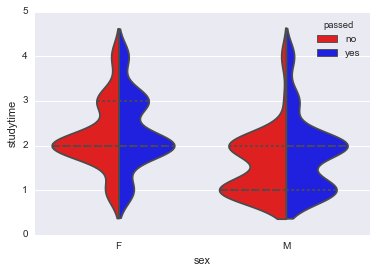

In [28]:
import seaborn as sns

sns.violinplot(x="sex", y="studytime", hue="passed", data=student_data, split=True, inner="quart", palette={"yes": "b", "no": "r"})
sns.despine(left=True)

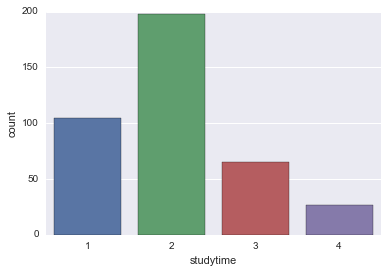

In [29]:
df_all = student_data.copy()
_ = sns.countplot(df_all['studytime'])

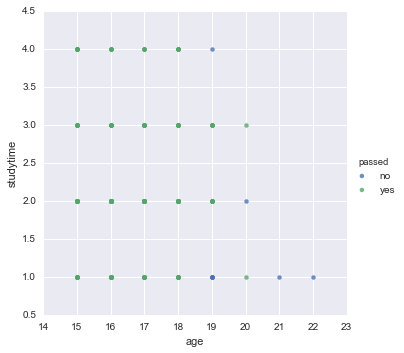

In [30]:
sns.lmplot(x="age", y="studytime", hue="passed", data=student_data, fit_reg=False)

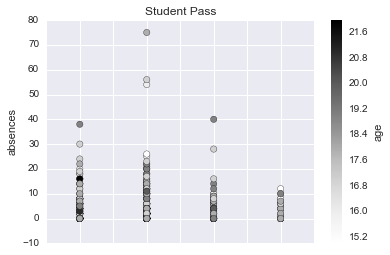

In [31]:
student_data.plot(kind='scatter', x="studytime", y="absences", c = 2, s=40, title='Student Pass',figsize=None, legend= True)

## Preparing the Data
In this section, we will prepare the data for modeling, training and testing.

### Identify feature and target columns
It is often the case that the data you obtain contains non-numeric features. This can be a problem, as most machine learning algorithms expect numeric data to perform computations with.

Run the code cell below to separate the student data into feature and target columns to see if any features are non-numeric.

In [32]:
# Extract feature columns
feature_cols = list(student_data.columns[:-1])

# Extract target column 'passed'
target_col = student_data.columns[-1] 

# Show the list of columns
print "Feature columns:\n{}".format(feature_cols)
print "\nTarget column: {}".format(target_col)

# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = student_data[feature_cols]
y_all = student_data[target_col]

# Show the feature information by printing the first five rows
print "\nFeature values:"
print display(X_all.head())

Feature columns:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Target column: passed

Feature values:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,1,1,3,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,5,3,3,1,1,3,4
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,3,2,2,3,3,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,3,2,2,1,1,5,2
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,1,2,5,4


None


### Preprocess Feature Columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section.

In [33]:
def preprocess_features(X):
    ''' Preprocesses the student data and converts non-numeric binary variables into
        binary (0/1) variables. Converts categorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():
        
        # If data type is non-numeric, replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
print "Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns))

Processed feature columns (48 total features):
['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


In [34]:
display(X_all.head().T)

,0,1,2,3,4
school_GP,1.0,1.0,1.0,1.0,1.0
school_MS,0.0,0.0,0.0,0.0,0.0
sex_F,1.0,1.0,1.0,1.0,1.0
sex_M,0.0,0.0,0.0,0.0,0.0
age,18.0,17.0,15.0,15.0,16.0
address_R,0.0,0.0,0.0,0.0,0.0
address_U,1.0,1.0,1.0,1.0,1.0
famsize_GT3,1.0,1.0,0.0,1.0,1.0
famsize_LE3,0.0,0.0,1.0,0.0,0.0
Pstatus_A,1.0,0.0,0.0,0.0,0.0


### Implementation: Training and Testing Data Split
So far, we have converted all _categorical_ features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. In the following code cell below, you will need to implement the following:
- Randomly shuffle and split the data (`X_all`, `y_all`) into training and testing subsets.
  - Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).
  - Set a `random_state` for the function(s) you use, if provided.
  - Store the results in `X_train`, `X_test`, `y_train`, and `y_test`.

In [35]:
from sklearn import cross_validation

# First, decide how many training vs test samples you want
num_all = X_all.shape[0]  # same as len(student_data)
num_train = 300  # about 75% of the data
num_test = num_all - num_train

# Shuffle and split the dataset into the number of training and testing points above
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X_all, y_all, stratify=y_all, test_size=num_test, random_state=64)


# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

print '\nTraining set grad rate: {}'.format(np.true_divide(sum(y_train=='yes'), len(y_train)))
print 'Test set grad rate: {}'.format(np.true_divide(sum(y_test=='yes'), len(y_test)))

Training set has 300 samples.
Testing set has 95 samples.

Training set grad rate: 0.67
Test set grad rate: 0.673684210526


## Training and Evaluating Models
In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in `scikit-learn`. You will first discuss the reasoning behind choosing these three models by considering what you know about the data and each model's strengths and weaknesses. You will then fit the model to varying sizes of training data (100 data points, 200 data points, and 300 data points) and measure the F<sub>1</sub> score. You will need to produce three tables (one for each model) that shows the training set size, training time, prediction time, F<sub>1</sub> score on the training set, and F<sub>1</sub> score on the testing set.

**The following supervised learning models are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
*List three supervised learning models that are appropriate for this problem. For each model chosen*
- Describe one real-world application in industry where the model can be applied. *(You may need to do a small bit of research for this — give references!)* 
- What are the strengths of the model; when does it perform well? 
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

##### **Answer: **

So in this problem we are dealing with only 395 students. so there are not many data to observe. So I would like to choose models which can **perform well with small number of observations** otherwise it will cause overfitting and also based on school requirement which they want classifier with **fast trainig and prediction speed** so it will take less time and also with school data we need classifier which **handles irrelevant features very well**.
These three models are:

1- Gaussian Naive Bayes (GaussianNB)

_real-world application:_ text recognition(determining spam emails)

_strength:_ fast trainign and prediction speed, performs well with small number of observation, handles irrelevant features very well, Prametic, somewhat easy to explain

_weakness:_ Not being able to automatically learn features interactions, Needs some parameter tuning for feature extraction, Relies on independence assumption and will perform badly if this assumption is not met

_Reason_: performs well with our small set of data - fast training and speed since the school like to spend less time - Handles irrelavent features very well which is good for our case since not all student data features are not related to assesing acceptance in final exam - It is easy to explain to school's officials - It is a classification model since we have categorical data


2- Ensemble Methods - Random Forests

To address overfitting, the first model I picked was Random Forest. Random Forest divides the training set into smaller ones, and trains a bunch of decision trees on those smaller datasets, then makes each decision tree have a vote. The predicted class that holds the most vote becomes the final vote of the ensemble classifier.

_real-world application:_ Internet traffic interception 

_strength:_ It has methods for balancing error in class population unbalanced data sets.

_weakness:_ Random forests have been observed to overfit for some datasets with noisy classification/regression tasks.

_Reason_: It has very high prediction accuracy so for our case we do not want to categorize students in wrong groups.
It can handle a lot of irrelevant features and separate signal from noise which in our case student data given from school can include irrelavant featutes.


3- Logistic Regression

_real-world application:_ Trauma and Injury Severity Score (TRISS), which is widely used to predict mortality in injured patients

_strength:_ Fast training and predictive speed, performs well with small number of observation, simple, has low viariance, provides probabilities for outcomes

_weakness:_  high bias

_Reason_: It is a classification model since we have categorical data - It has fast training and predicting speed which is our case we want to spend less time and cost. - It does not need parameter tuning except regularization so it is simple - It performs well with our small data set - It is easy to explain to school officials



### Setup
Run the code cell below to initialize three helper functions which you can use for training and testing the three supervised learning models you've chosen above. The functions are as follows:
- `train_classifier` - takes as input a classifier and training data and fits the classifier to the data.
- `predict_labels` - takes as input a fit classifier, features, and a target labeling and makes predictions using the F<sub>1</sub> score.
- `train_predict` - takes as input a classifier, and the training and testing data, and performs `train_clasifier` and `predict_labels`.
 - This function will report the F<sub>1</sub> score for both the training and testing data separately.

In [36]:
from sklearn.metrics import f1_score

def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print "Trained model in {:.4f} seconds".format(end - start)

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Print and return results
    print "Made predictions in {:.4f} seconds.".format(end - start)
    return f1_score(target.values, y_pred, pos_label='yes')


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print "Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    print "F1 score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train))
    print "F1 score for test set: {:.4f}.".format(predict_labels(clf, X_test, y_test))

### Implementation: Model Performance Metrics
With the predefined functions above, you will now import the three supervised learning models of your choice and run the `train_predict` function for each one. Remember that you will need to train and predict on each classifier for three different training set sizes: 100, 200, and 300. Hence, you should expect to have 9 different outputs below — 3 for each model using the varying training set sizes. In the following code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `clf_A`, `clf_B`, and `clf_C`.
 - Use a `random_state` for each model you use, if provided.
 - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Create the different training set sizes to be used to train each model.
 - *Do not reshuffle and resplit the data! The new training points should be drawn from `X_train` and `y_train`.*
- Fit each model with each training set size and make predictions on the test set (9 in total).  
**Note:** Three tables are provided after the following code cell which can be used to store your results.

In [37]:
# TODO: Import the three supervised learning models from sklearn
# from sklearn import model_A
from sklearn.naive_bayes import GaussianNB
# from sklearn import model_B
from sklearn.ensemble import RandomForestClassifier
# from sklearn import model_C
from sklearn.linear_model import LogisticRegression

# TODO: Initialize the three models
clf_A = GaussianNB()
clf_B = RandomForestClassifier(random_state=0)
clf_C = LogisticRegression(random_state=0)

# TODO: Set up the training set sizes
X_train_100 = X_train[:100] 
y_train_100 = y_train[:100]

X_train_200 = X_train[:200]
y_train_200 = y_train[:200]

X_train_300 = X_train[:300]
y_train_300 = y_train[:300]

# TODO: Execute the 'train_predict' function for each classifier and each training set size
# train_predict(clf, X_train, y_train, X_test, y_test)
train_predict(clf_A, X_train_100, y_train_100, X_test, y_test)
train_predict(clf_A, X_train_200, y_train_200, X_test, y_test)
train_predict(clf_A, X_train_300, y_train_300, X_test, y_test)

print "******************"

#random_state : int,  or None, optional (default=None)
train_predict(clf_B, X_train_100, y_train_100, X_test, y_test)
train_predict(clf_B, X_train_200, y_train_200, X_test, y_test)
train_predict(clf_B, X_train_300, y_train_300, X_test, y_test)

print "******************"

#random_state : int seed, or None (default=None)
train_predict(clf_C, X_train_100, y_train_100, X_test, y_test)
train_predict(clf_C, X_train_200, y_train_200, X_test, y_test)
train_predict(clf_C, X_train_300, y_train_300, X_test, y_test)

Training a GaussianNB using a training set size of 100. . .
Trained model in 0.0017 seconds
Made predictions in 0.0005 seconds.
F1 score for training set: 0.4889.
Made predictions in 0.0009 seconds.
F1 score for test set: 0.4318.
Training a GaussianNB using a training set size of 200. . .
Trained model in 0.0009 seconds
Made predictions in 0.0003 seconds.
F1 score for training set: 0.7774.
Made predictions in 0.0002 seconds.
F1 score for test set: 0.7541.
Training a GaussianNB using a training set size of 300. . .
Trained model in 0.0008 seconds
Made predictions in 0.0004 seconds.
F1 score for training set: 0.8038.
Made predictions in 0.0004 seconds.
F1 score for test set: 0.7786.
******************
Training a RandomForestClassifier using a training set size of 100. . .
Trained model in 0.0202 seconds
Made predictions in 0.0009 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0009 seconds.
F1 score for test set: 0.6822.
Training a RandomForestClassifier using a trainin

### Tabular Results
Edit the cell below to see how a table can be designed in [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#tables). You can record your results from above in the tables provided.

** Classifer 1 - GaussianNB**  

| Training Set Size | Training Time           | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |        0.0015           |        0.0006          |     0.4889       |     0.4318      |
| 200               |        0.0008           |        0.0004          |     0.7774       |     0.7541      |
| 300               |        0.0008           |        0.0003          |     0.8038       |     0.7786      |

** Classifer 2 - RandomForestClassifier**  

| Training Set Size | Training Time           | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |        0.0273           |        0.0013          |     1.0000       |     0.6822      |
| 200               |        0.0250           |        0.0017          |     0.9888       |     0.7826      |
| 300               |        0.0345           |        0.0025          |     0.9900       |    0.7794      |

** Classifer 3 - LogisticRegression**  

| Training Set Size | Training Time           | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |        0.0028           |        0.0004          |     0.8921       |     0.7087      |
| 200               |        0.0028           |        0.0004          |     0.8435       |     0.7820      |
| 300               |        0.0037           |        0.0004          |     0.8299       |     0.8000      |


# Choosing the Best Model
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F<sub>1</sub> score. 

### Question 3 - Choosing the Best Model
*Based on the experiments you performed earlier, in one to two paragraphs, explain to the board of supervisors what single model you chose as the best model. Which model is generally the most appropriate based on the available data, limited resources, cost, and performance?*

**Answer: **
Based on the tabular result I got from the previous section I chose Logistic Regression based on the following reasons:

1- It has the shortest training time comparing to Random forset and Gaussian Naive Bayes, specially for smallest set of data which is 100. So it is fastest in training time.

2- It has the shortest prediction time comparing to others.

3- It has the best F1 score for testing and training. Random Forst classifier got F1 score of 1 for training and lower for testing which indicates model overfitting.

### Question 4 - Model in Layman's Terms
*In one to two paragraphs, explain to the board of directors in layman's terms how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical or technical jargon, such as describing equations or discussing the algorithm implementation.*

**Answer: **
I am going to use logistic regression as a model to determine whether a student is going to pass the exam based on the observerd characteristics and her/his provided information. 
The reason of choosing this model are:
This model is pretty fast to teach and also when it has been taught how to predict it is pretty fast to predict with good precision(F1 score). It is also suitable for categorical decision making as we are trying to category our students based on PASS or FAIL mark in their final exam. This model also can perform very well with small number of students so we do not need many student to teach the model how to decide on students final exam result.

As it shown in below image what logistic regression does it to try to draw a line between passes and failed student in order to categorize them into to groups. How that line should be is the art of training the model to find the best separator. So when we find out the line in training phase then if we have a new datapoint based on the line position we know when the new data point will be.

<img src="assets/logisticRegression.JPG">

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.gridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
- Initialize the classifier you've chosen and store it in `clf`.
- Create the F<sub>1</sub> scoring function using `make_scorer` and store it in `f1_scorer`.
 - Set the `pos_label` parameter to the correct value!
- Perform grid search on the classifier `clf` using `f1_scorer` as the scoring method, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_obj`.

In [43]:
from sklearn.grid_search import GridSearchCV 
from sklearn.metrics import make_scorer
from sklearn.linear_model import LogisticRegression
def performance_metric(label, prediction):
    return f1_score(label, prediction, pos_label='yes')

# TODO: Create the parameters list you wish to tune
parameters = [
    {
      'C': (10., 1., 0.5, 0.1),
      'max_iter': (100, 200, 500)
    }
 ]

# TODO: Initialize the classifier
clf = LogisticRegression(random_state=42)

# TODO: Make an f1 scoring function using 'make_scorer' 
f1_scorer = make_scorer(f1_score, pos_label='yes')


# TODO: Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = GridSearchCV(clf, parameters, scoring = f1_scorer, n_jobs=16, pre_dispatch='2*n_jobs', verbose=1)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj.fit(X_train, y_train)

# Get the estimator
clf = grid_obj.best_estimator_

# Report the final F1 score for training and testing after parameter tuning
print "Tuned model has a training F1 score of {:.4f}.".format(predict_labels(clf, X_train, y_train))
print "Tuned model has a testing F1 score of {:.4f}.".format(predict_labels(clf, X_test, y_test))

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Made predictions in 0.0002 seconds.
Tuned model has a training F1 score of 0.8202.
Made predictions in 0.0002 seconds.
Tuned model has a testing F1 score of 0.8201.


[Parallel(n_jobs=16)]: Done  36 out of  36 | elapsed:    0.3s finished



### Look at logistic regression coeffs

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

# helper function for top n coefficients of the logistic regression model
def visualize_coefficients(classifier, feature_names, n_features=10):
    # get coefficients with large absolute values 
    coef = classifier.coef_.ravel()
    pos_coeffs = np.argsort(coef)[-n_features:]
    neg_coeffs = np.argsort(coef)[:n_features]
    hmm_coeffs = np.hstack([neg_coeffs, pos_coeffs])
    
    # plot the coeefs
    plt.figure(figsize=(15, 5))
    colors = ["red" if c < 0 else "blue" for c in coef[hmm_coeffs]]
    plt.bar(np.arange(20), coef[hmm_coeffs], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 21), feature_names[hmm_coeffs], rotation=35, ha="right");

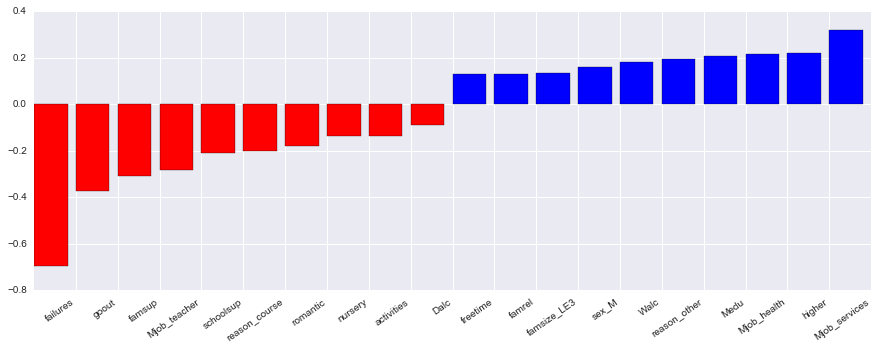

In [45]:
# look at the coeffs
visualize_coefficients(clf, X_train.columns)

### Question 5 - Final F<sub>1</sub> Score
*What is the final model's F<sub>1</sub> score for training and testing? How does that score compare to the untuned model?*

**Answer: **

The final model's F1 score is 0.8202 for training and 0.8201 for testing. Compared to the untuned model the training score is lower but the testing score is significantly higher. But it is important to know that logistic regression does not need much parameter tuning but more regularization.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.